# Treinamento de entrada e saída de dados utilizando Pandas.
<p>Prática da biblioteca Pandas em um projeto onde:
    
-Consumo dados de uma API disponibilizada pelo IBGE para obter nomes de pessoas e fazer uma simulação como se fossem alunos de uma plataforma;
    
-Leio uma tabela de cursos, de um site fictício, para atribuir aos alunos os cursos aos quais eles estão matriculados;
    
-Crio e manipulo um Banco de Dados a partir das Data Frames gerados;
    
-Exporto as tabelas geradas em diversos formatos de arquivos;
</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### API IBGE
<p>Guia de Api's</p>
<a>https://servicodados.ibge.gov.br/api/docs/censos/nomes?versao=2</a>

<p>
    <b>Ranking por frequência</b> - obtém o ranking dos nomes segundo a frequência de nascimentos por década: </p>
<a>https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking</a>

<p>Lendo o json extraído da Api, filtrando por quantidade (200 nomes) e sexo</p>

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=F")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=M")

## Estruturando os nomes

In [3]:
nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


Colocando as duas variáveis em uma única lista

In [4]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

<p>Da Api são trazidos 5 índices: nome, regiao, frequencia rank e sexo.
    
   Concateno as duas variáveis, que estão armazenadas dentro da variável frames, seleciono somente a coluna 'nome' e por fim transformo em um Data Frame. </p>

In [5]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


## Incluindo ID dos alunos

Quantidade de alunos, pelo número de registros da variável nomes

In [6]:
total_alunos = len(nomes)
total_alunos

400

Criando nova coluna 'id_aluno' gerando números aleatórios para cada aluno

In [7]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes

,nome,id_aluno
0,MARIA,77
1,ANA,371
2,FRANCISCA,64
3,ANTONIA,375
4,ADRIANA,329
...,...,...
195,WALTER,198
196,ARLINDO,206
197,MICHAEL,117
198,ALVARO,213


Como cada aluno precisa de um email cadastrado da plataforma, crio uma lista com 3 domínios de email e uma coluna correspondente.

Em seguida, os domínios são distribuídos aleatoriamente, de acordo com a quantidade de alunos (400 vezes).

In [8]:
dominios = ['@aluno-platX.com.br', '@aluno-platY.com.br', '@aluno-platZ.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [9]:
nomes.head(10)

,nome,id_aluno,dominio
0,MARIA,77,@aluno-platY.com.br
1,ANA,371,@aluno-platZ.com.br
2,FRANCISCA,64,@aluno-platZ.com.br
3,ANTONIA,375,@aluno-platZ.com.br
4,ADRIANA,329,@aluno-platX.com.br
5,JULIANA,214,@aluno-platY.com.br
6,MARCIA,358,@aluno-platY.com.br
7,FERNANDA,330,@aluno-platZ.com.br
8,PATRICIA,363,@aluno-platZ.com.br
9,ALINE,243,@aluno-platY.com.br


Cria-se uma nova coluna 'email', concatenando os nomes com os dominios, depois transformando em uma string minúscula

In [10]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [11]:
nomes.sample(5)   #sample() retorna uma quantidade de registros aleatórios

,nome,id_aluno,dominio,email
166,MICHEL,156,@aluno-platY.com.br,michel@aluno-platy.com.br
189,WESLEI,1,@aluno-platZ.com.br,weslei@aluno-platz.com.br
75,NELSON,210,@aluno-platX.com.br,nelson@aluno-platx.com.br
114,ARTHUR,130,@aluno-platZ.com.br,arthur@aluno-platz.com.br
147,LILIAN,382,@aluno-platZ.com.br,lilian@aluno-platz.com.br


Agora que temos nossa coluna email, a coluna dominio torna-se redundante e pode ser excuída.

In [12]:
nomes = nomes.drop(columns='dominio')
nomes.head()

,nome,id_aluno,email
0,MARIA,77,maria@aluno-platy.com.br
1,ANA,371,ana@aluno-platz.com.br
2,FRANCISCA,64,francisca@aluno-platz.com.br
3,ANTONIA,375,antonia@aluno-platz.com.br
4,ADRIANA,329,adriana@aluno-platx.com.br


## Criando a tabela Cursos

Importando bibliotecas para trabalhar com html

In [13]:
!pip3 install html5lib
!pip3 install lxml

In [14]:
import html5lib

Lendo tabela de cursos de um site fictício 

In [15]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [16]:
type(cursos)

list

Convertendo lista para dataframe

In [17]:
cursos = cursos[0]
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [18]:
type(cursos)

pandas.core.frame.DataFrame

Renomeando coluna

In [19]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


Criando nova coluna id, começando no número 1. Em seguida determino essa nova coluna com índice

In [20]:
cursos['id_curso'] = cursos.index + 1
cursos.head()

,nome_do_curso,id_curso
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [21]:
cursos = cursos.set_index('id_curso')
cursos.head()

,nome_do_curso
id_curso,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


## Matriculando os alunos nos cursos

In [22]:
nomes.sample(5)

,nome,id_aluno,email
152,GERSON,273,gerson@aluno-platx.com.br
45,ANDREIA,400,andreia@aluno-platy.com.br
145,ITALO,325,italo@aluno-platy.com.br
32,MARCIO,380,marcio@aluno-platz.com.br
46,FABIANA,62,fabiana@aluno-platx.com.br


Crio a coluna de matrículas em cursos, que diz a quantidade de cursos que cada aluno está inscrito. Gero um número inteiro, aleatório e acima de 0, de acordo com o total de alunos.

In [23]:
nomes['matriculas_em_cursos'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [24]:
nomes.sample(5)

,nome,id_aluno,email,matriculas_em_cursos
12,RAFAEL,49,rafael@aluno-platz.com.br,1
97,OSVALDO,255,osvaldo@aluno-platy.com.br,2
194,CLARA,93,clara@aluno-platz.com.br,2
189,DALVA,295,dalva@aluno-platx.com.br,1
128,EDVALDO,209,edvaldo@aluno-platx.com.br,1


Gerando gráfico da distribuição de alunos em cursos

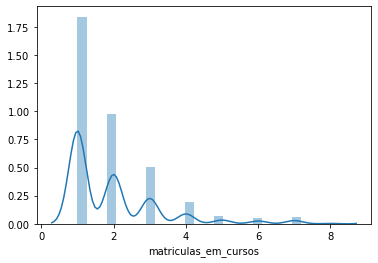

In [25]:
sns.distplot(nomes.matriculas_em_cursos)

Menor quantidade de matrículas em cursos

In [26]:
nomes.matriculas_em_cursos.min()

1

Maior quantidade de matrículas em cursos

In [27]:
nomes['matriculas_em_cursos'].max()

8

Contagem de alunos inscritos em determinado número de cursos.

1° coluna: número de cursos matriculados

2° coluna: quantidade de alunos


In [28]:
nomes.matriculas_em_cursos.value_counts()

1    198
2    105
3     54
4     21
5      8
7      7
6      6
8      1
Name: matriculas_em_cursos, dtype: int64

## Selecionando cursos

Distribuir os cursos para os alunos, conforme o número de cursos em que cada um está matriculado.

In [29]:
todas_matriculas = []
x = np.random.rand(20)   #Função que faz uma distribuição aleatória de valores, no caso 20 pois é o número de cursos
prob = x / sum(x)

In [30]:
for index, row in nomes.iterrows():   #Parseia as linhas do dataframe nomes
    id = row.id_aluno   #armazena o id do aluno na variável id
    matriculas = row.matriculas_em_cursos   #armazena as matriculas de cada aluno na variável matrícula
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]   #Para cada id de aluno serão selecionados, aleatoriamente, ids de cursos (cada aluno receberá um ou mais cursos)
        todas_matriculas.append(mat)   #atribui as matrículas geradas à uma nova lista (todas_matriculas)
        
matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])   #Criando novo dataframe matriculas


In [31]:
matriculas.head(10)

,id_aluno,id_curso
0,77,9
1,371,18
2,371,2
3,371,15
4,371,8
5,371,5
6,64,12
7,375,11
8,329,3
9,329,18


Agora é feita a junção do dataframe 'matricula' com o 'cursos' (coluna 'nome_do_curso'), ordenando pelo id do curso.

Renomeio a coluna 'id_aluno' para 'quantidade_alunos'.

Assim sabemos quantos alunos têm matriculados em cada curso.

In [32]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})
matriculas_por_curso.head(10)

,quantidade_alunos,nome_do_curso
id_curso,,
1,40,Lógica de programação
2,58,Java para Web
3,54,C# para Web
4,39,Ruby on Rails
5,71,Cursos de Python
6,3,PHP com MySql
7,47,.NET para web
8,36,Novas integrações com Java
9,23,TDD com Java


## Saída em diferentes formatos

### Para CSV

In [33]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv')

In [34]:
pd.read_csv('matriculas_por_curso.csv')

,id_curso,quantidade_alunos,nome_do_curso
0,1,40,Lógica de programação
1,2,58,Java para Web
2,3,54,C# para Web
3,4,39,Ruby on Rails
4,5,71,Cursos de Python
5,6,3,PHP com MySql
6,7,47,.NET para web
7,8,36,Novas integrações com Java
8,9,23,TDD com Java
9,10,9,Código limpo com C#


### Para Json

In [35]:
matriculas_json = matriculas_por_curso.to_json()

In [36]:
matriculas_json

'{"quantidade_alunos":{"1":40,"2":58,"3":54,"4":39,"5":71,"6":3,"7":47,"8":36,"9":23,"10":9,"11":18,"12":43,"13":18,"14":46,"15":80,"16":13,"17":66,"18":67,"19":54,"20":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

### Para HTML

In [37]:
matriculas_html = matriculas_por_curso.to_html()

In [38]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>40</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>58</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>54</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>39</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>71</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>3</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>47</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>36</td>\n      <td>Novas integrações com Java</td>\n    

In [39]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>40</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>58</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>54</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>39</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>71</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>47</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>36</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>23</td>
    

## Criando um Banco de Dados a partir do data frame

In [40]:
!pip install sqlalchemy

In [41]:
from sqlalchemy import create_engine, MetaData, Table

O sqlite é o banco de dados nativo da biblioteca, sendo usado por padrão

In [42]:
engine = create_engine('sqlite:///:memory:')   #Salvando o banco na memória local

Crio um banco de dados usando o data frame matriculas_por_curso;

O primeiro parâmetro da função corresponde ao nome que a tabela do banco receberá, o segundo é a variável engine

In [43]:
matriculas_por_curso.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,40,Lógica de programação
2,58,Java para Web
3,54,C# para Web
4,39,Ruby on Rails
5,71,Cursos de Python


In [44]:
matriculas_por_curso.to_sql('matriculas', engine)

Visualizando as tabelas existentes no Banco

In [45]:
print(engine.table_names())

['matriculas']


### Buscando do Banco via sql

Criando query de busca

In [46]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [47]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,6,3,PHP com MySql
1,10,9,Código limpo com C#
2,11,18,Preparatório para certificação Java
3,13,18,Persistência com .NET
4,16,13,Estatística básica
5,20,2,Orientação objetos com Java


Retornando colunas específicas de uma tabela e armazenando em uma variável

In [48]:
alunos_por_cursos = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])
alunos_por_cursos

,nome_do_curso,quantidade_alunos
0,Lógica de programação,40
1,Java para Web,58
2,C# para Web,54
3,Ruby on Rails,39
4,Cursos de Python,71
5,PHP com MySql,3
6,.NET para web,47
7,Novas integrações com Java,36
8,TDD com Java,23
9,Código limpo com C#,9


Com essa variável também é possível realizar querys

In [49]:
cursos_com_mais_matriculas = alunos_por_cursos.query('quantidade_alunos > 50')
cursos_com_mais_matriculas

,nome_do_curso,quantidade_alunos
1,Java para Web,58
2,C# para Web,54
4,Cursos de Python,71
14,Análise de dados,80
16,Internet das coisas,66
17,Programação funcional,67
18,Boas práticas em Java,54


Também é possível usar essas novas querys para criar tabelas a parte

In [50]:
cursos_com_mais_matriculas.to_sql('muitas_matriculas', con=engine)

In [51]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


## Nomes dos alunos da próxima turma

Revisando os Data Frames

In [52]:
matriculas_por_curso

,quantidade_alunos,nome_do_curso
id_curso,,
1,40,Lógica de programação
2,58,Java para Web
3,54,C# para Web
4,39,Ruby on Rails
5,71,Cursos de Python
6,3,PHP com MySql
7,47,.NET para web
8,36,Novas integrações com Java
9,23,TDD com Java


In [53]:
matriculas

,id_aluno,id_curso
0,77,9
1,371,18
2,371,2
3,371,15
4,371,8
...,...,...
782,117,19
783,213,9
784,213,5
785,309,16


Crio uma query que retorna os registros de somente um id de curso específico, usando como exemplo o curso de estatística

In [54]:
proxima_turma_estatistica =  matriculas.query("id_curso == 16")
proxima_turma_estatistica

,id_aluno,id_curso
45,350,16
47,129,16
295,110,16
316,21,16
347,234,16
361,296,16
521,5,16
572,30,16
648,107,16
674,31,16


Porém, ter um retorno de apenas os id's dos alunos não é adequado. Por isso faço uma junção da tabela matriculas com a tabela nomes.

Como nas tabela 'matriculas' e 'nomes' temos duas colunas redundantes, index e id_aluno, também vou definir a id_aluno como index.

In [55]:
nomes.head()

,nome,id_aluno,email,matriculas_em_cursos
0,MARIA,77,maria@aluno-platy.com.br,1
1,ANA,371,ana@aluno-platz.com.br,5
2,FRANCISCA,64,francisca@aluno-platz.com.br,1
3,ANTONIA,375,antonia@aluno-platz.com.br,1
4,ADRIANA,329,adriana@aluno-platx.com.br,2


In [56]:
nomes = nomes.set_index('id_aluno')
nomes.head()

,nome,email,matriculas_em_cursos
id_aluno,,,
77,MARIA,maria@aluno-platy.com.br,1
371,ANA,ana@aluno-platz.com.br,5
64,FRANCISCA,francisca@aluno-platz.com.br,1
375,ANTONIA,antonia@aluno-platz.com.br,1
329,ADRIANA,adriana@aluno-platx.com.br,2


In [57]:
proxima_turma_estatistica = proxima_turma_estatistica.set_index('id_aluno').join(nomes[['nome', 'email']])
proxima_turma_estatistica

,id_curso,nome,email
id_aluno,,,
350,16,MARIANA,mariana@aluno-platx.com.br
129,16,GABRIELA,gabriela@aluno-platx.com.br
110,16,LORENA,lorena@aluno-platz.com.br
21,16,CONCEICAO,conceicao@aluno-platz.com.br
234,16,REBECA,rebeca@aluno-platz.com.br
296,16,IRACEMA,iracema@aluno-platx.com.br
5,16,MIGUEL,miguel@aluno-platx.com.br
30,16,FABRICIO,fabricio@aluno-platx.com.br
107,16,EVANDRO,evandro@aluno-platy.com.br


Renomeando a coluna

In [63]:
proxima_turma_estatistica = proxima_turma_estatistica.rename(columns={'nome':'alunos_estatística_básica'})
proxima_turma_estatistica

,id_curso,alunos_estatística_básica,email
id_aluno,,,
350,16,MARIANA,mariana@aluno-platx.com.br
129,16,GABRIELA,gabriela@aluno-platx.com.br
110,16,LORENA,lorena@aluno-platz.com.br
21,16,CONCEICAO,conceicao@aluno-platz.com.br
234,16,REBECA,rebeca@aluno-platz.com.br
296,16,IRACEMA,iracema@aluno-platx.com.br
5,16,MIGUEL,miguel@aluno-platx.com.br
30,16,FABRICIO,fabricio@aluno-platx.com.br
107,16,EVANDRO,evandro@aluno-platy.com.br


## Exportando para Excel


In [64]:
proxima_turma_estatistica.to_excel('proxima_turma.xlsx', index = False)